In [2]:
from src.core.dryvrmain import verify
%matplotlib notebook


In [7]:
from scipy.integrate import odeint
import numpy as np 
import time

def thermo_dynamic(y,t,rate):
    dydt = rate*y
    return dydt

def TC_Simulate(Mode,initialCondition,time_bound):
    time_step = 0.05;
    time.sleep(0.2)
    time_bound = float(time_bound)
    initial = [float(tmp)  for tmp in initialCondition]
    number_points = int(np.ceil(time_bound/time_step))
    t = [i*time_step for i in range(0,number_points)]
    if t[-1] != time_step:
        t.append(time_bound)

    y_initial = initial[0]

    if Mode == 'On':
        rate = 0.1
    elif Mode == 'Off':
        rate = -0.1
    else:
        print('Wrong Mode name!')
    sol = odeint(thermo_dynamic,y_initial,t,args=(rate,),hmax = time_step)

    # Construct the final output
    trace = []
    for j in range(len(t)):
        #print t[j], current_psi
        tmp = []
        tmp.append(t[j])
        tmp.append(sol[j,0])
        trace.append(tmp)
    return trace

In [4]:
args = {
    "vertex" : ["On","Off","On"],
    "edge":[[0,1],[1,2]],
    "variables":["temp"],
    "guards":["And(t>1.0,t<=1.1)","And(t>1.0,t<=1.1)"],
    "initialSet":[[75.0],[76.0]],
    "unsafeSet":"@On:temp>91@Off:temp>91",
    "timeHorizon":3.5,
}

<IPython.core.display.Javascript object>


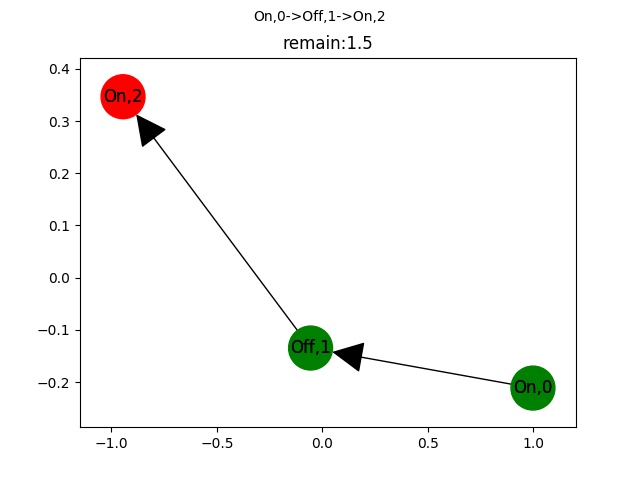

transit time 1.1 remain time 2.4
transit time 1.0 remain time 1.4
transit time 1.4 remain time 0.0
Verification Begin
Mode: 0
stack size: 1
remainTime: 3.5

Lower Bound: [75.0]
Upper Bound: [76.0]
Delta: [0.5]

current mode label: On
Off 1.0 [[82.88456685684291], [85.26238230168656]] And(t>1.0,t<=1.1)
Mode 0 check bloated tube safe
Child exist in cur mode inital 1 is curModeStack Now
Mode: 1
stack size: 1
remainTime: 2.5

Lower Bound: [82.88456685684291]
Upper Bound: [85.26238230168656]
Delta: [1.188907722421824]

current mode label: Off
On 1.0 [[73.88049586874365], [77.14415873624822]] And(t>1.0,t<=1.1)
Mode 1 check bloated tube safe
Child exist in cur mode inital 2 is curModeStack Now
Mode: 2
stack size: 1
remainTime: 1.5

Lower Bound: [73.88049586874365]
Upper Bound: [77.14415873624822]
Delta: [1.6318314337522821]

current mode label: On
Mode 2 check bloated tube safe
No child exist in current initial, pop
back flag safe from 2 to 1
No child in prev mode initial, pop, 1 is curModeSt

<src.core.reachtube.ReachTube instance at 0x115710950>

In [8]:
verify(args, TC_Simulate)

<IPython.core.display.Javascript object>


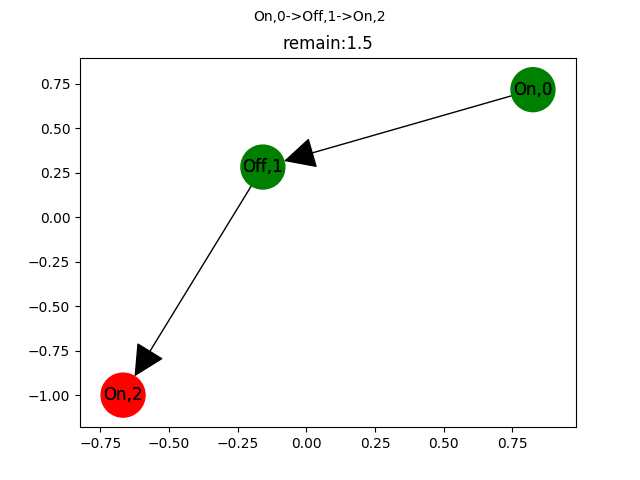

transit time 1.0 remain time 2.5
transit time 1.05 remain time 1.45
transit time 1.45 remain time 0.0
transit time 1.1 remain time 2.4
transit time 1.1 remain time 1.3
transit time 1.3 remain time 0.0
Verification Begin
Mode: 0
stack size: 1
remainTime: 3.5

Lower Bound: [75.0]
Upper Bound: [76.0]
Delta: [0.5]

current mode label: On
Off 1.0 [[82.88456670664768], [85.26238246769492]] And(t>1.0,t<=1.1)
Mode 0 check bloated tube safe
Child exist in cur mode inital 1 is curModeStack Now
Mode: 1
stack size: 1
remainTime: 2.5

Lower Bound: [82.88456670664768]
Upper Bound: [85.26238246769492]
Delta: [1.1889078805236224]

current mode label: Off
On 1.0 [[73.88049567533761], [77.1441589415605]] And(t>1.0,t<=1.1)
Mode 1 check bloated tube safe
Child exist in cur mode inital 2 is curModeStack Now
Mode: 2
stack size: 1
remainTime: 1.5

Lower Bound: [73.88049567533761]
Upper Bound: [77.1441589415605]
Delta: [1.631831633111446]

current mode label: On
Mode 2 check bloated tube safe
No child exist i

In [9]:
config = {
    "SIMUTESTNUM":2
}


In [8]:
print(reach)

On,0
0.0 74.9926640958975
0.05 76.38578169788498
0.05 75.36878849560183
0.1 76.76844582774076
0.1 75.74679921540287
0.15 77.153026720198
0.15 76.12670540540628
0.2 77.53953409377445
0.2 76.50851668670315
0.25 77.9279779337459
0.25 76.89224294669677
0.3 78.31836782854501
0.3 77.27789367549954
0.35 78.71071352617032
0.35 77.66547852233982
0.4 79.10502482634739
0.4 78.05500718772103
0.45 79.50131157835705
0.45 78.4464894212479
0.5 79.89958367904835
0.5 78.8399350196373
0.55 80.29985107509155
0.55 79.23535382896908
0.6 80.70212376312904
0.6 79.63275574483501
0.65 81.1064117898934
0.65 80.03215071245468
0.7 81.51272525246054
0.7 80.43354872692645
0.75 81.92107429849075
0.75 80.83695983346652
0.8 82.33146912648571
0.8 81.24239412766372
0.85 82.74391998604602
0.85 81.64986175573486
0.9 83.15843717812618
0.9 82.05937291477767
0.95 83.57503105529179
0.95 82.47093785302572
1.0 83.99371202197823
1.0 82.88456687010496
1.05 84.41449053475039
1.05 83.30027031729134
1.1 84.83737710256403
On,0->Off,1


In [9]:
reach.modes

['On', 'Off', 'On']

In [10]:
reach.variables

['temp']

In [11]:
reach.filter(mode="Off")

[[['On,0->Off,1', 't', 'temp'],
  [0.0, 82.45980811720315],
  [0.05, 85.26782231976584],
  [0.05, 82.04905420137109],
  [0.1, 84.84203018856482],
  [0.1, 81.64034650307214],
  [0.15000000000000002, 84.41836453679774],
  [0.15000000000000002, 81.23367469376558],
  [0.2, 83.99681508467283],
  [0.2, 80.82902827572013],
  [0.25, 83.57737112434366],
  [0.25, 80.42639728562641],
  [0.30000000000000004, 83.16002178082906],
  [0.30000000000000004, 80.02577168436596],
  [0.35000000000000003, 82.74475671561444],
  [0.35000000000000003, 79.62714148589356],
  [0.4, 82.33156551640981],
  [0.4, 79.23049675433444],
  [0.45, 81.92043782602099],
  [0.45, 78.83582760142237],
  [0.5, 81.5113633394359],
  [0.5, 78.44312418838085],
  [0.55, 81.10433180125173],
  [0.55, 78.05237672557554],
  [0.6000000000000001, 80.69933300754532],
  [0.6000000000000001, 77.66357547211513],
  [0.65, 80.29635680551475],
  [0.65, 77.27671073560708],
  [0.7000000000000001, 79.89539309306953],
  [0.7000000000000001, 76.89177287